### 첫번째 시간입니다
- 하잉~

### 목표
- 학생들의 수학 성적을 예측하는 회귀 모델을 만들어보자!
- Keras를 이용해 신경망을 구성하는 방법을 익혀보자!

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
#print working directory : 현재 작업 경로 출력
%pwd

'/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정'

In [160]:
%cd /content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정

/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정


In [161]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정'

In [162]:
data = pd.read_csv('data/student-mat.csv', delimiter = ';')

In [163]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [164]:
pd.set_option('display.max_columns', None)

In [165]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


- 문제, 정답 분리

In [166]:
# 문제는 studytime, 정답은 G3
X = data['studytime']
y = data['G3']

In [167]:
X.shape, y.shape

((395,), (395,))

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [169]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(296,)
(99,)
(296,)
(99,)


### 신경망 모델 만들기
- 1. 신경망 구조 설계
- 2. 신경망 학습 및 평가 방법 설정
- 3. 학습 및 학습과정 시각화
- 4. 모델 평가

In [170]:
# 1. 신경망 구조 설계
#Sequential : 신경망의 뼈대를 구축하기 위한 함수
from tensorflow.keras import Sequential
# inputLayer: 신경망의 입력층을 생성
# Dense : 신경망 층(뉴런의 묶음)을 구성해주는 함수
from tensorflow.keras.layers import InputLayer, Dense

In [171]:
model = Sequential() # 신경망 뼈대 설정

# 입력층 설정
# input_shape : 입력 데이터와 특성 형태를 설정(1개의 특성을 가진)
model.add(InputLayer(input_shape=(1,)))

# 출력층 설정
# Dense : 하나의 층을 쌓아주는 함수(괄호 안의 숫자는 해당 층에 있는 뉴런의 개수)
model.add(Dense(1))

# 설계된 신경망의 정보를 요약해서 출력
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [172]:
# 2. 신경망 학습 및 평가방법 설정
# 손실함수(비용함수), 최적화함수 설정
model.compile(loss='mse',
              optimizer = 'SGD')

In [173]:
# 3. 학습 및 시각화
h = model.fit(X_train, y_train,
              epochs=100 # 학습 횟수 설정
              )

Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 94.3443
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 32.4787
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 26.0649
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 25.2411
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 24.8607
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 24.4769
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 24.1840
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 23.9586
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 23.6775
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 23.4044
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 23.0890
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 22.8695
Epoch 13/100
10/10 [=====

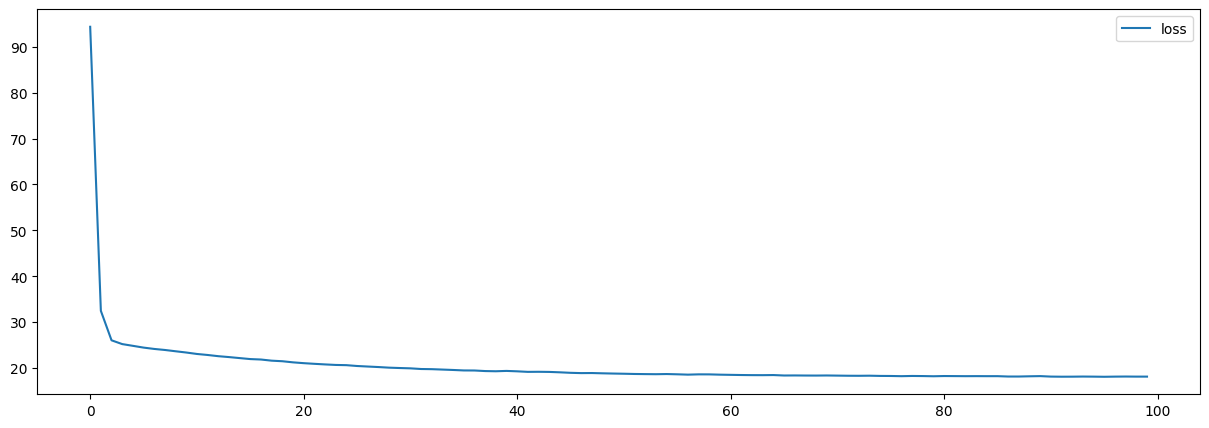

In [174]:
# 3. 학습 과정 시각화
plt.figure(figsize=(15, 5))

# history : 학습시 출력되는 값(loss,acc)들을 가져올 수 있게 해주는 명령
plt.plot(h.history['loss'], label='loss')

plt.legend()
plt.show()

- 초반에는 빠르게 loss값(mse)이 떨어지고 있음
- 경사하강법 초반에는 가중치(w), 절편(b)값이 임의의 값으로 설정되어 있기 대문에 몇번만 학습시켜도 mse가 빠르게 줄어드는 것을 볼 수 있음

In [175]:
# 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 29.3932


29.39320945739746

### 입력 특성이 2개인 모델을 직접 만들어보자^_^
- 문제 (studytime, traveltime)-X1
- 정답(G3) - y1
- 신경망의 최종 출력층 뉴런 개수는 1개


In [176]:
#직접 1~4 단계를 진행해보아요

In [177]:
X1 = data.loc[:, 'traveltime':'studytime']
y1 = data['G3']

In [178]:
X1.shape, y1.shape

((395, 2), (395,))

In [179]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=33)

In [180]:
model1 = Sequential() # 신경망 뼈대 설정

# 입력층 설정
# input_shape : 입력 데이터와 특성 형태를 설정(1개의 특성을 가진)
model1.add(InputLayer(input_shape=(2,)))

# 출력층 설정
# Dense : 하나의 층을 쌓아주는 함수(괄호 안의 숫자는 해당 층에 있는 뉴런의 개수)
model1.add(Dense(1))

# 설계된 신경망의 정보를 요약해서 출력
model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [181]:
# 2. 신경망 학습 및 평가방법 설정
# 손실함수(비용함수), 최적화함수 설정
model1.compile(loss='mse',
              optimizer = 'SGD')

In [182]:
h1 = model1.fit(X1_train, y1_train,
              epochs=100 # 학습 횟수 설정
              )

Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 78.5979
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 26.9045
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 24.7904
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 24.4653
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 24.4443
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 23.9315
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 23.7366
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 23.5779
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 23.4505
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 23.1394
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 22.9457
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 22.7715
Epoch 13/100
10/10 [=====

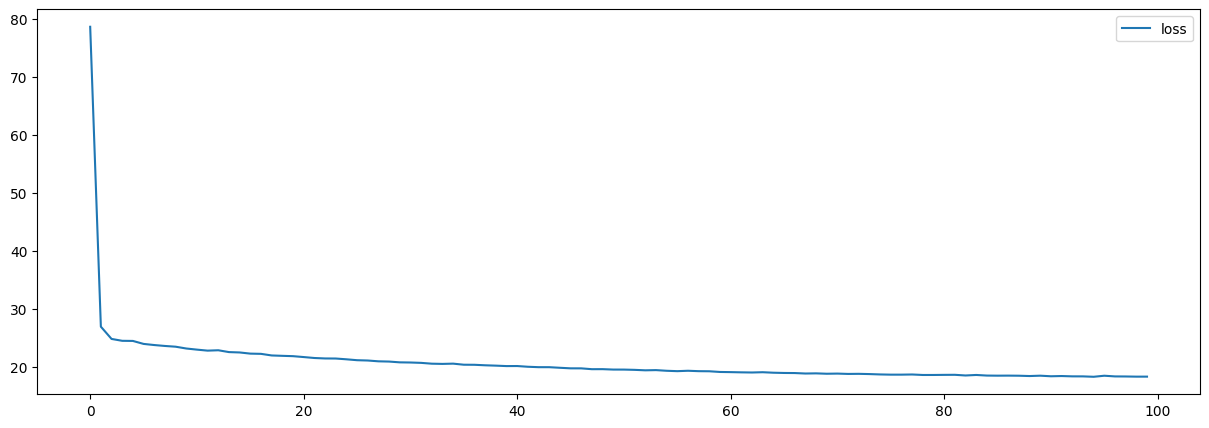

In [183]:
plt.figure(figsize=(15, 5))

# history : 학습시 출력되는 값(loss,acc)들을 가져올 수 있게 해주는 명령
plt.plot(h1.history['loss'], label='loss')

plt.legend()
plt.show()